In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Read the voice dataset
mydata = pd.read_csv("voice.csv")

# Preview voice dataset
#print(mydata.head())
#print(mydata.shape)

# Plot the histograms
male = mydata.loc[mydata['label'] == 'male']
female = mydata.loc[mydata['label'] == 'female']

X = mydata.drop('label', axis=1)
y = mydata['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
#fig, ax = plt.subplots(5, 4, figsize=(20, 20))

for i in range(20):
    ax[i // 4, i % 4].hist(male.iloc[:, i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i // 4, i % 4].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i // 4, i % 4].set_title(list(male)[i])
    ax[i // 4, i % 4].set_yticks(())

#plt.show()

NameError: name 'ax' is not defined

In [16]:
'''
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["male", "female"], loc="best")
fig.tight_layout()

plt.show()
'''

'\nax[0].set_xlabel("Feature magnitude")\nax[0].set_ylabel("Frequency")\nax[0].legend(["male", "female"], loc="best")\nfig.tight_layout()\n\nplt.show()\n'

In [142]:
#Train support vector machine model
svm = SVC().fit(X_train, y_train)
y_predsvm = svm.predict(X_test_scaled)
print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

print("Classification Report:")
print(classification_report(y_test, y_predsvm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predsvm))

c:\Users\sbca1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Support Vector Machine
Accuracy on training set: 0.682
Accuracy on test set: 0.656
Classification Report:
              precision    recall  f1-score   support

      female       0.00      0.00      0.00       297
        male       0.53      1.00      0.69       337

    accuracy                           0.53       634
   macro avg       0.27      0.50      0.35       634
weighted avg       0.28      0.53      0.37       634

Confusion Matrix:
[[  0 297]
 [  0 337]]


c:\Users\sbca1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sbca1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sbca1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
import matplotlib.pyplot as plt

# Plot the variable importance
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)
    plt.figure(figsize=(10, 6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(range(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance Plot")
    plt.show()

# Assuming 'tree', 'forest', and 'gbrt' are trained models
# Replace 'feature_names' with the actual names of your features
# Call the function for each model
#plot_feature_importances(svm, X.columns)

In [28]:
#Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_prednb = nb_classifier.predict(X_test)

accuracynb = accuracy_score(y_test, y_prednb)
print("Accuracy:", accuracynb)

print("Classification Report:")
print(classification_report(y_test, y_prednb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_prednb))


Accuracy: 0.9037854889589906
Classification Report:
              precision    recall  f1-score   support

      female       0.90      0.90      0.90       297
        male       0.91      0.91      0.91       337

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.90      0.90      0.90       634

Confusion Matrix:
[[266  31]
 [ 30 307]]


In [29]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the Logistic Regression Model
logreg_classifier = LogisticRegression()

# Train the Model
logreg_classifier.fit(X_train, y_train)

# Make Predictions
y_predlg = logreg_classifier.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_predlg)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_predlg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predlg))


Accuracy: 0.8123028391167192
Classification Report:
              precision    recall  f1-score   support

      female       0.81      0.79      0.80       297
        male       0.82      0.83      0.83       337

    accuracy                           0.81       634
   macro avg       0.81      0.81      0.81       634
weighted avg       0.81      0.81      0.81       634

Confusion Matrix:
[[234  63]
 [ 56 281]]


c:\Users\sbca1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X contains your features and y contains the corresponding labels (0 or 1 for binary classification)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_predsvm = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predsvm)
print("Support Vector Machine")
print("Accuracy on test set: {:.3f}".format(accuracy))

print("Classification Report:")
print(classification_report(y_test, y_predsvm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predsvm))


Support Vector Machine
Accuracy on test set: 0.656
Classification Report:
              precision    recall  f1-score   support

      female       0.65      0.58      0.61       297
        male       0.66      0.73      0.69       337

    accuracy                           0.66       634
   macro avg       0.66      0.65      0.65       634
weighted avg       0.66      0.66      0.65       634

Confusion Matrix:
[[171 126]
 [ 92 245]]


In [144]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X contains your features and y contains the corresponding labels (0 or 1 for binary classification)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Support Vector Machine With Feature Scaling Normalization")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Support Vector Machine With Feature Scaling Normalization
Accuracy on test set: 0.9842271293375394
Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.98      0.98       297
        male       0.99      0.99      0.99       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Confusion Matrix:
[[292   5]
 [  5 332]]


c:\Users\sbca1\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


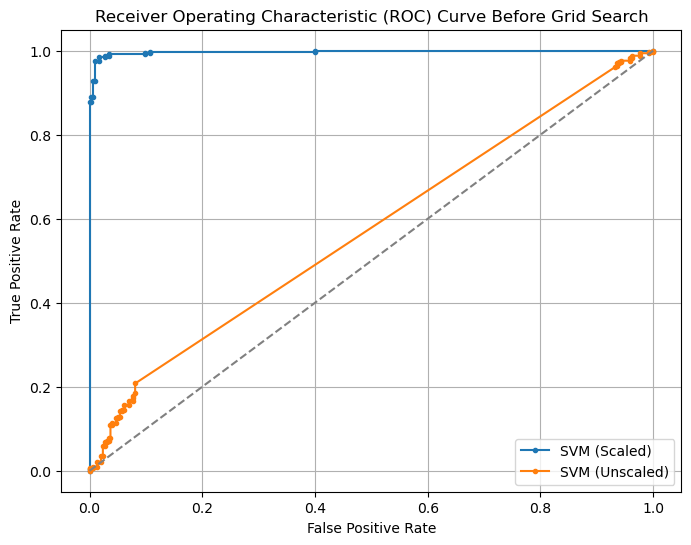

ROC AUC (Scaled): 0.9970925875970386
ROC AUC (Unscaled): 0.5718060925776061


In [145]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming svm_model is your trained SVM classifier and X_test, X_test_scaled, y_test_binary are your test data
# Get decision function scores for scaled data
y_scores_scaled = svm_model.decision_function(X_test_scaled)

# Get decision function scores for unscaled data
y_scores_unscaled = svm_model.decision_function(X_test)

# Compute ROC curve for scaled data
fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test_binary, y_scores_scaled)

# Compute ROC AUC for scaled data
roc_auc_scaled = roc_auc_score(y_test_binary, y_scores_scaled)

# Compute ROC curve for unscaled data
fpr_unscaled, tpr_unscaled, thresholds_unscaled = roc_curve(y_test_binary, y_scores_unscaled)

# Compute ROC AUC for unscaled data
roc_auc_unscaled = roc_auc_score(y_test_binary, y_scores_unscaled)

# Plot ROC curves for both scaled and unscaled data
plt.figure(figsize=(8, 6))
plt.plot(fpr_scaled, tpr_scaled, marker='.', label='SVM (Scaled)')
plt.plot(fpr_unscaled, tpr_unscaled, marker='.', label='SVM (Unscaled)')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plot diagonal line for reference
plt.title('Receiver Operating Characteristic (ROC) Curve Before Grid Search')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print('ROC AUC (Scaled):', roc_auc_scaled)
print('ROC AUC (Unscaled):', roc_auc_unscaled)


c:\Users\sbca1\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


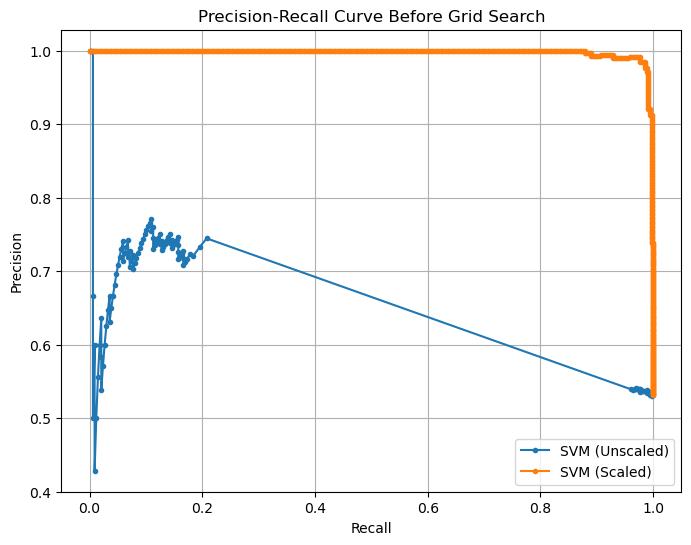

In [146]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming svm_model is your trained SVM classifier and X_test, X_test_scaled, y_test_binary are your test data
# Get decision function scores
y_scores = svm_model.decision_function(X_test)
y_scores_scaled = svm_model.decision_function(X_test_scaled)

# Compute precision and recall for unscaled data
precision_unscaled, recall_unscaled, _ = precision_recall_curve(y_test_binary, y_scores)

# Compute precision and recall for scaled data
precision_scaled, recall_scaled, _ = precision_recall_curve(y_test_binary, y_scores_scaled)

# Plot precision-recall curves for both unscaled and scaled data
plt.figure(figsize=(8, 6))
plt.plot(recall_unscaled, precision_unscaled, marker='.', label='SVM (Unscaled)')
plt.plot(recall_scaled, precision_scaled, marker='.', label='SVM (Scaled)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Before Grid Search')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X contains your features and y contains the corresponding labels (0 or 1 for binary classification)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', C=10, gamma='scale', random_state=42)

# Train the SVM model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9763406940063092
Classification Report:
              precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Confusion Matrix:
[[293   4]
 [ 11 326]]


In [33]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X contains your features and y contains the corresponding labels (0 or 1 for binary classification)
# Split the data into training and testing sets

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],                   # Regularization parameter
    'kernel': ['linear', 'rbf'],         # Kernel type
    'gamma': ['scale', 'auto'],          # Kernel coefficient (for 'rbf' kernel)
}

# Initialize the SVM classifier
svm_model = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
y_predsvmgs = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predsvmgs)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_predsvmgs))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predsvmgs))


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9842271293375394
Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.99      0.98       297
        male       0.99      0.98      0.99       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Confusion Matrix:
[[293   4]
 [  6 331]]


In [147]:
# Evaluate the model
print("Support Vector Machine")
print("Best Hyperparameters:", best_params)
accuracy = accuracy_score(y_test, y_predsvmgs)
print("Accuracy on testing:", accuracy)

print("Classification Report:")
svmcr = classification_report(y_test, y_predsvmgs)
print(svmcr)

print("Confusion Matrix:")
svmcm = confusion_matrix(y_test, y_predsvmgs)
print(svmcm)

Support Vector Machine
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy on testing: 0.9842271293375394
Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.99      0.98       297
        male       0.99      0.98      0.99       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Confusion Matrix:
[[293   4]
 [  6 331]]


In [148]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X contains your features and y contains the corresponding labels (0 or 1 for binary classification)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', C=10, gamma='scale', random_state=42)

# Train the SVM model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_predsvm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predsvm)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_predsvm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predsvm))


Accuracy: 0.9763406940063092
Classification Report:
              precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Confusion Matrix:
[[293   4]
 [ 11 326]]


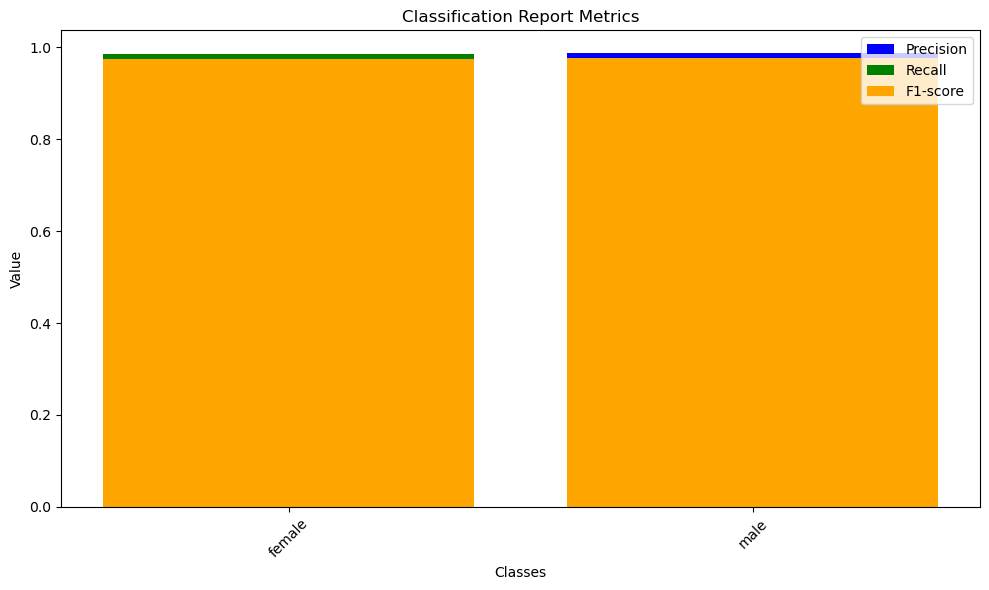

In [51]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
# Generate classification report
report = classification_report(y_test, y_predsvm, output_dict=True)

# Extract precision, recall, and F1-score for each class
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.bar(classes, precision, color='blue', label='Precision')
plt.bar(classes, recall, color='green', label='Recall')
plt.bar(classes, f1_score, color='orange', label='F1-score')

# Add labels and legend
plt.xlabel('Classes')
plt.ylabel('Value')
plt.title('Classification Report Metrics')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


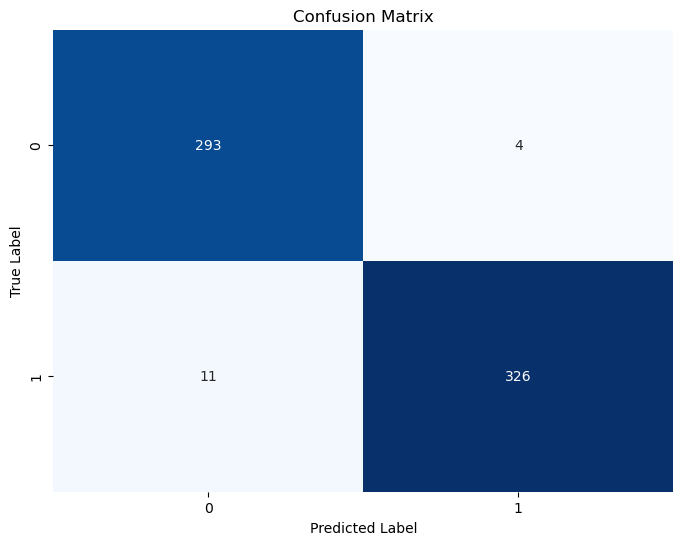

In [52]:
# Plot the confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predsvm), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

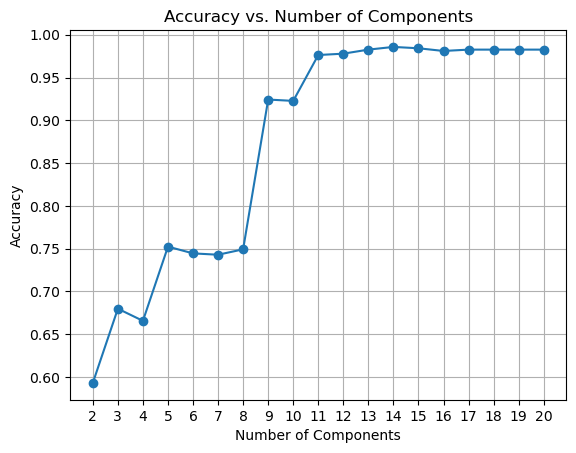

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' contains your features and 'y' contains the corresponding labels (0 or 1 for binary classification)
# Split the data into training and testing sets

# Initialize lists to store accuracy scores and number of components
accuracy_scores = []
n_components_list = list(range(2, 21))

# Loop through different number of components
for n_components in n_components_list:
    # Initialize PCA and SVM classifier
    pca = PCA(n_components=n_components)  # Choose the number of components
    svm_model = SVC(kernel='linear', C=10, gamma='scale', random_state=42)
    
    # Create a pipeline to perform PCA and then SVM
    pipeline = Pipeline([('pca', pca), ('svm', svm_model)])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot accuracy scores vs. number of components
plt.plot(n_components_list, accuracy_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Components')
plt.xticks(n_components_list)
plt.grid(True)
plt.show()


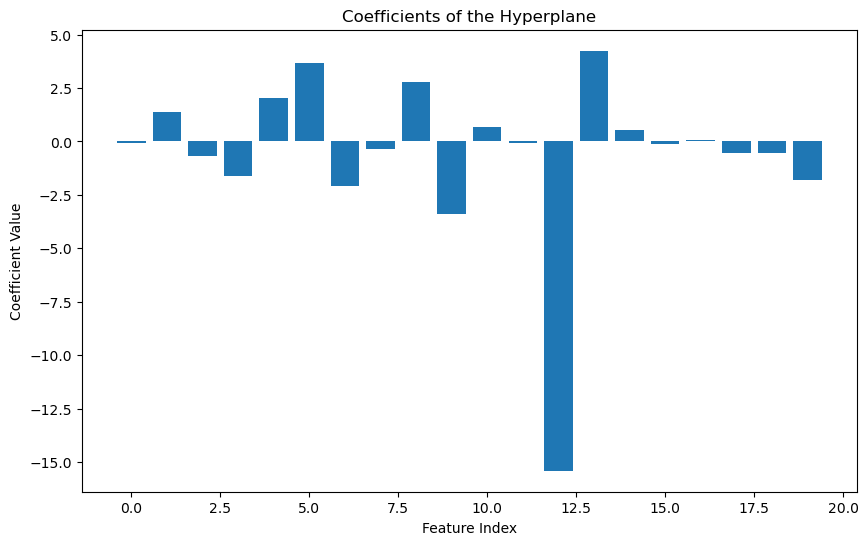

In [121]:
feature_importances = svm_model.coef_[0]

# Print feature importances
#for i, importance in enumerate(feature_importances):
    #print("Feature {}: Importance = {}".format(i, importance))
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Hyperplane')
plt.show()


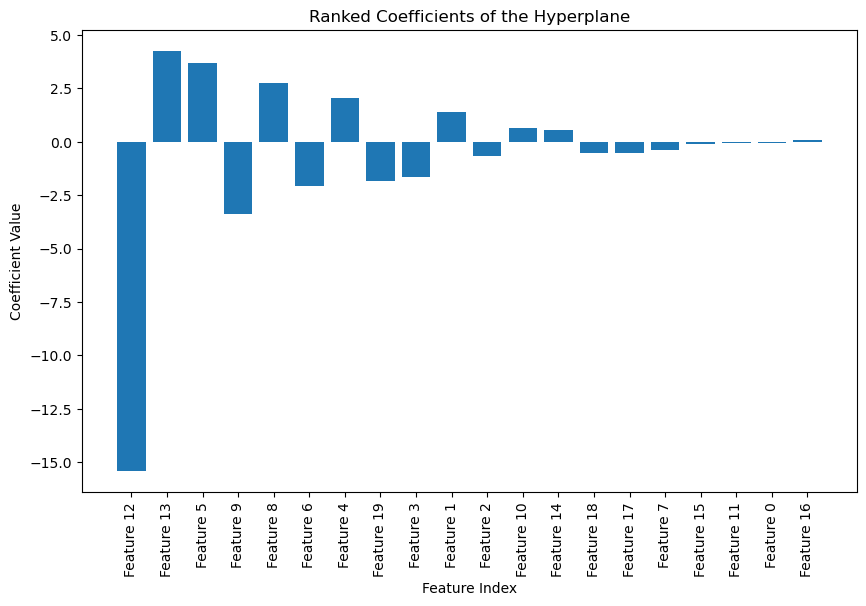

In [122]:
coefficients = svm_model.coef_[0]

# Get the absolute values of coefficients
abs_coefficients = np.abs(coefficients)

# Rank coefficients based on their magnitude
ranked_indices = np.argsort(abs_coefficients)[::-1]

# Get feature names
feature_names = ["Feature {}".format(i) for i in range(len(coefficients))]

# Plot ranked coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients[ranked_indices])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ranked Coefficients of the Hyperplane')
plt.xticks(range(len(coefficients)), np.array(feature_names)[ranked_indices], rotation=90)
plt.show()

c:\Users\sbca1\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


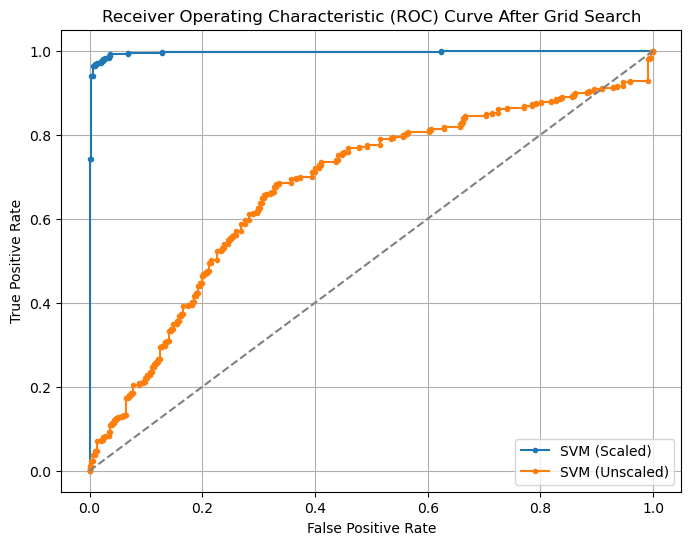

ROC AUC (Scaled): 0.996093476805643
ROC AUC (Unscaled): 0.6751191439618739


In [149]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming svm_model is your trained SVM classifier and X_test, X_test_scaled, y_test_binary are your test data
# Get decision function scores for scaled data
y_scores_scaled = svm_model.decision_function(X_test_scaled)

# Get decision function scores for unscaled data
y_scores_unscaled = svm_model.decision_function(X_test)

# Compute ROC curve for scaled data
fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test_binary, y_scores_scaled)

# Compute ROC AUC for scaled data
roc_auc_scaled = roc_auc_score(y_test_binary, y_scores_scaled)

# Compute ROC curve for unscaled data
fpr_unscaled, tpr_unscaled, thresholds_unscaled = roc_curve(y_test_binary, y_scores_unscaled)

# Compute ROC AUC for unscaled data
roc_auc_unscaled = roc_auc_score(y_test_binary, y_scores_unscaled)

# Plot ROC curves for both scaled and unscaled data
plt.figure(figsize=(8, 6))
plt.plot(fpr_scaled, tpr_scaled, marker='.', label='SVM (Scaled)')
plt.plot(fpr_unscaled, tpr_unscaled, marker='.', label='SVM (Unscaled)')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plot diagonal line for reference
plt.title('Receiver Operating Characteristic (ROC) Curve After Grid Search')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print('ROC AUC (Scaled):', roc_auc_scaled)
print('ROC AUC (Unscaled):', roc_auc_unscaled)


c:\Users\sbca1\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


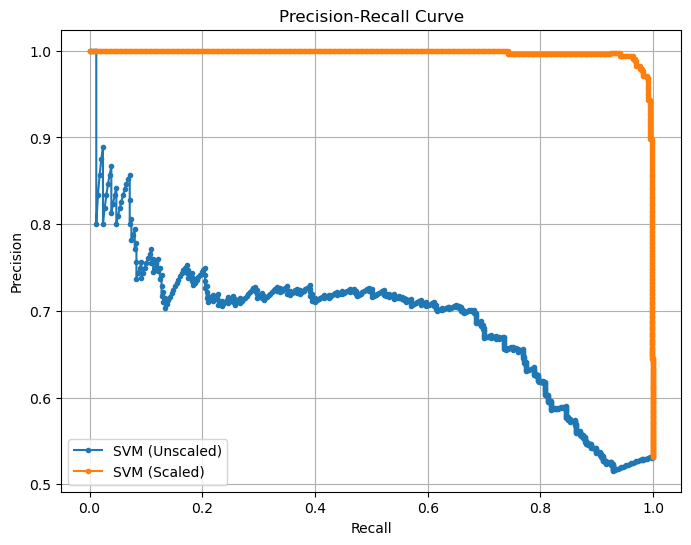

In [150]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming svm_model is your trained SVM classifier and X_test, X_test_scaled, y_test_binary are your test data
# Get decision function scores
y_scores = svm_model.decision_function(X_test)
y_scores_scaled = svm_model.decision_function(X_test_scaled)

# Compute precision and recall for unscaled data
precision_unscaled, recall_unscaled, _ = precision_recall_curve(y_test_binary, y_scores)

# Compute precision and recall for scaled data
precision_scaled, recall_scaled, _ = precision_recall_curve(y_test_binary, y_scores_scaled)

# Plot precision-recall curves for both unscaled and scaled data
plt.figure(figsize=(8, 6))
plt.plot(recall_unscaled, precision_unscaled, marker='.', label='SVM (Unscaled)')
plt.plot(recall_scaled, precision_scaled, marker='.', label='SVM (Scaled)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()